In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams.update({'font.size': 22})

In [3]:
from pandas_datapackage_reader import read_datapackage

from util import root

Target unit: GtC

# Global Carbon Budget

In [4]:
GCB = "Global Carbon Budget 2017"

In [5]:
# Global Carbon Budget
path_gcb = root / "data/global-carbon-budget"

# Unit is GtC
co2_gcb = read_datapackage(path_gcb, "historical-budget")["Fossil-Fuel-Industry"] 

# Unit is MtC
bunkers_gcb = read_datapackage(path_gcb, "territorial-emissions-gcb").loc["Bunkers"]["Emissions"] / 1000

Projection +2% in 2017, p.431 in GCB 2017 paper

In [6]:
co2_gcb_projection = pd.read_csv(root / "data/global-carbon-budget-projection.csv", index_col=0)["Emissions"] / 3.67

# PRIMAP-hist

In [7]:
PRIMAPHIST = "PRIMAPHIST v1.2"

In [8]:
primaphist = pd.read_csv(root / "data/primap-hist/PRIMAP-hist_v1.2_14-Dec-2017.csv")
primaphist = primaphist.drop(["scenario", "unit"], axis=1)
primaphist = primaphist.set_index(["country", "category", "entity"])
primaphist = primaphist.sort_index()
primaphist.columns = primaphist.columns.astype(int)

In [9]:
# Does not include international bunkers.
co2_primaphist = primaphist.loc["EARTH", "CATM0EL", "CO2"] / 10**6 / 3.67 # Gg -> GtC 

# EDGAR CO2

In [10]:
EDGAR = "EDGARv4.3.2_FT2016"

In [11]:
edgar = read_datapackage(root / "data/edgar-co2-emissions")

In [12]:
# Unit is kton (Gg) CO2 per year
co2_edgar = edgar.loc["WORLD"].groupby("Year").sum()["Emissions"] / 10**6 / 3.67 # -> GtC

# Figure

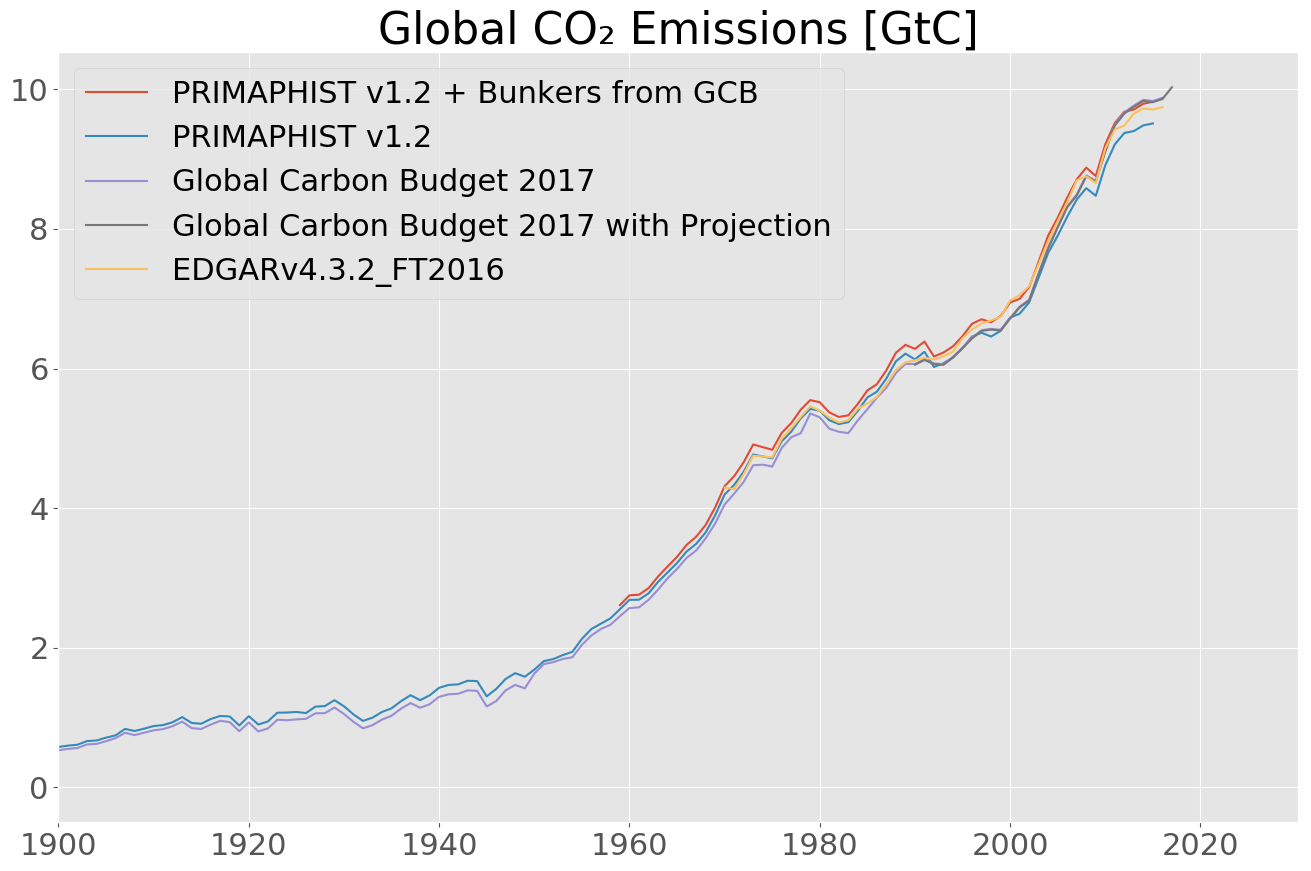

In [13]:
(co2_primaphist + bunkers_gcb).plot(label=PRIMAPHIST + " + Bunkers from GCB")
co2_primaphist.plot(label=PRIMAPHIST)
co2_gcb.plot(label=GCB)
co2_gcb_projection.plot(label=GCB + " with Projection")
co2_edgar.plot(label=EDGAR)
plt.title("Global CO₂ Emissions [GtC]")
plt.legend()
plt.xlabel("")
plt.xlim(1900)

plt.savefig(
    root / "content/images/global-co2.png",
    bbox_inches="tight", 
    pad_inches=0
)

# Time ranges

In [14]:
co2_gcb.index

Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year', length=267)

In [15]:
co2_primaphist.index

Int64Index([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=166)

In [16]:
co2_gcb_projection.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

In [17]:
co2_edgar.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016],
           dtype='int64', name='Year')